# Redes Neurais: Introdução ao Keras
Vimos em notebooks anteriores a implementação de alguns algoritmos de Machine Learning. Estes e outros algoritmos já estão bem estabelecidos na comunidade e em projetos de ML normalmente são utilizadas bibliotecas que nos permitem focar apenas no problema que estamos tentando resolver.

Uma das bibliotecas de ML mais conhecidas é o TensorFlow. Ela serve para realizar operações entre tensores e executar alguns algoritmos de otimização, por exemplo. Porém, utilizar o TF as vezes se torna cansativo. Para solucionar este problema, foi desenvolvido uma biblioteca que utiliza o TF em um nível mais alto apenas para a implementação de redes neurais, o Keras.

Neste exemplo mostraremos como treinar uma rede neural com uma camada oculta para identificar dígitos escritos a mão.

## Implementação
Importaremos algumas bibliotecas, dentre elas o modelo Sequential e o tipo de camada Dense. Veremos mais a frente como cada um funciona.

In [36]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### O Dataset
Carregaremos a partir da biblioteca MNIST as imagens no formato (28, 28) e as labels de cada imagem tanto para treinamento quanto para validação.

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

As imagens possuem valores de 0 até 255. É uma boa prática normalizar estes valores para que a rede possa generalizar mais rápido. Deixaremos os valores entre -0.5 e 0.5. Em seguida "achataremos" as imagens de (28, 28) para 784. Dessa forma, teremos apenas uma dimensão de entrada.

In [4]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

### O Modelo
Instanciaremos o modelo sequencial

In [45]:
model = Sequential()

Definimos uma rede da seguinte forma:
+ A camada de entrada possui 784 neurônios, referentes ao tamanho da imagem
+ A camada oculta terá 64 neurônios e ativação ReLU
+ A camada de saída terá 10 neurônios correspondentes a cada digito e saída softmax

In [46]:
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

Compilaremos o modelo com o otimizador ADAM e função de custo categorical_crossentropy.

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Treinando o Modelo
Nesta etapa treinaremos o modelo com 10 épocas e tamanho do batch 32

In [48]:
history = model.fit(
  train_images, to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=10,
  batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3894 - acc: 0.8854 - val_loss: 0.2525 - val_acc: 0.9250
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2210 - acc: 0.9342 - val_loss: 0.2004 - val_acc: 0.9412
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.1729 - acc: 0.9489 - val_loss: 0.1599 - val_acc: 0.9526
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1434 - acc: 0.9577 - val_loss: 0.1528 - val_acc: 0.9571
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1251 - acc: 0.9618 - val_loss: 0.1316 - val_acc: 0.9620
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1122 - acc: 0.9657 - val_loss: 0.1273 - val_acc: 0.9615
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1021 - acc: 0.9684 - val_loss: 0.1232 - val_acc

### Resultados
A rede obteve 96% de acurácia no conjunto de validação em apenas 10 épocas.

#### Custo durante o treinamento

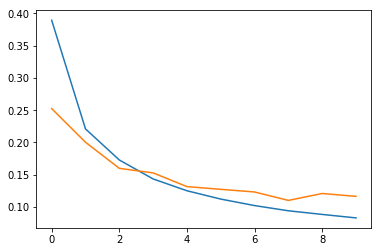

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#### Acurácia durante o treinamento

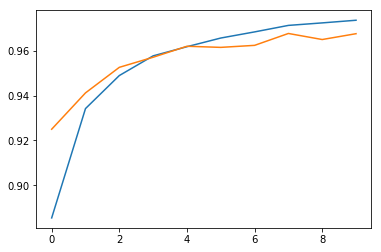

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Testando em outras images
O método `predict` passa uma entrada pela rede neural e nos retorna a saída. Por exemplo:

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


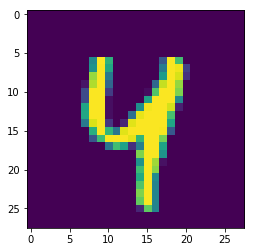

In [61]:
image = test_images[42]

pred = model.predict(image.reshape(1, 784))
print(pred.round())

plt.imshow(image.reshape(28,28))
plt.show()